# Calculate band structure of the $WS_2$ nanotube.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get parameters from the FP calculation
para = pd.read_csv('~/OneDrive - connect.hku.hk/capstone/tnn_para.csv')

In [29]:
# define the function to calculate the band structure
def structure(e1, e2, t0, t1, t2, t11, t12, t22, r0, r1, r2, r11, r12, u0, u1, u2, u11, u12, u22):
    
    energy = np.linspace(0, 0, 200)
    energy = energy.reshape(200,1)
    # different segments in the Brillouin zone
    for i in range(49):
        
        # draw the first Brillouin zone
        kx = np.linspace(i*np.pi/12, i*np.pi/12, 200)
        ky = np.linspace(np.pi/np.sqrt(3), -np.pi/np.sqrt(3), 200)
        X = 1/2*kx
        Y = np.sqrt(3)/2*ky

        # build the Hamiltonian matrix
        v0 = e1 + 2*t0*(2*np.cos(X)*np.cos(Y) + np.cos(2*X)) + 2*r0*(2*np.cos(3*X)*np.cos(Y) + np.cos(2*Y)) + 2*u0*(2*np.cos(2*X)*np.cos(2*Y) + np.cos(4*X))
        rv1 = - 2*np.sqrt(3)*t2*np.sin(X)*np.sin(Y) + 2*(r1 + r2)*np.sin(3*X)*np.sin(Y) - 2*np.sqrt(3)*u2*np.sin(2*X)*np.sin(2*Y)
        iv1 = 2*t1*np.sin(X)*(2*np.cos(X) + np.cos(Y)) + 2*(r1 - r2)*np.sin(3*X)*np.cos(Y) + 2*u1*np.sin(2*X)*(2*np.cos(2*X) + np.cos(2*Y))
        rv2 = 2*t2*(np.cos(2*X) - np.cos(X)*np.cos(Y)) - 2/np.sqrt(3)*(r1 + r2)*(np.cos(3*X)*np.cos(Y) - np.cos(2*Y)) + 2*u2*(np.cos(4*X) - np.cos(2*X)*np.cos(2*Y))
        iv2 = 2*np.sqrt(3)*t1*np.cos(X)*np.sin(Y) + 2/np.sqrt(3)*np.sin(Y)*(r1 - r2)*(np.cos(3*X) + 2*np.cos(Y)) + 2*np.sqrt(3)*u1*np.cos(2*X)*np.sin(2*Y)
        v11 = e2 + (t11 + 3*t22)*np.cos(X)*np.cos(Y) + 2*t11*np.cos(2*X) + 4*r11*np.cos(3*X)*np.cos(Y) + 2*(r11 + np.sqrt(3)*r12)*np.cos(2*Y) + (u11 + 3*u22)*np.cos(2*X)*np.cos(2*Y) + 2*u11*np.cos(4*X)
        rv12 = np.sqrt(3)*(t22 - t11)*np.sin(X)*np.sin(Y) + 4*r12*np.sin(3*X)*np.sin(Y) + np.sqrt(3)*(u22 - u11)*np.sin(2*X)*np.sin(2*Y)
        iv12 = 4*t12*np.sin(X)*(np.cos(X) - np.cos(Y)) + 4*u12*np.sin(2*X)*(np.cos(2*X) - np.cos(2*Y))
        v22 = e2 + (3*t11 + t22)*np.cos(X)*np.cos(Y) + 2*t22*np.cos(2*X) + 2*r11*(2*np.cos(3*X)*np.cos(Y) + np.cos(2*Y)) + 2/np.sqrt(3)*r12*(4*np.cos(3*X)*np.cos(Y) - np.cos(2*Y)) + (3*u11 + u22)*np.cos(2*X)*np.cos(2*Y) + 2*u22*np.cos(4*X)
        ham = np.array([[v0, rv1 + 1j*iv1, rv2 + 1j*iv2], [rv1 - 1j*iv1, v11, rv12 + 1j*iv12], [rv2 - 1j*iv2, rv12 - 1j*iv12, v22]])

        # calculate the eigenvalues
        # the eigenvalues are stored in the array 'eig'
        eig = np.array([0, 0, 0])
        for j in range(200):
            eigenvalue = np.real(np.linalg.eigvals(ham[:,:,j]))
            eigenvalue = np.sort(eigenvalue)
            eig = np.vstack((eig, eigenvalue))
        eig = eig[1:,:]
        energy = np.hstack((energy, eig))
    energy = energy[:,1:]
    return energy

In [33]:
# band = structure(0.717, 1.916, -0.152, -0.097, 0.590, 0.047, 0.178, 0.016, 0.069, -0.261, 0.107, -0.003, 0.109, -0.054, 0.045, 0.002, 0.325, -0.206, -0.163)
#band = structure(para['e1'][1], para['e2'][1], para['t0'][1], para['t1'][1], para['t2'][1], para['t11'][1], para['t12'][1], para['t22'][1], para['r0'][1], para['r1'][1], para['r2'][1], para['r11'][1], para['r12'][1], para['u0'][1], para['u1'][1], para['u2'][1], para['u11'][1], para['u12'][1], para['u22'][1])
band = structure(para['e1'][0], para['e2'][0], para['t0'][0], para['t1'][0], para['t2'][0], para['t11'][0], para['t12'][0], para['t22'][0], para['r0'][0], para['r1'][0], para['r2'][0], para['r11'][0], para['r12'][0], para['u0'][0], para['u1'][0], para['u2'][0], para['u11'][0], para['u12'][0], para['u22'][0])


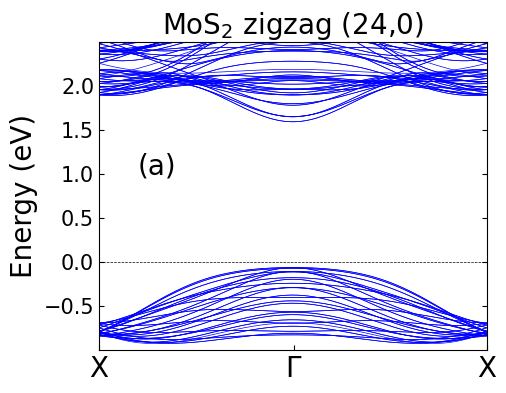

In [34]:
fig = plt.figure(figsize = (5, 4))

plt.title('MoS$_2$ zigzag (24,0)', fontsize = 20)
plt.text(20, 1.0, '(a)', fontsize = 20)

plt.plot(band, color = 'blue', linewidth = 0.5)
plt.xlim(0, 199)
plt.ylim(-1, 2.5)
plt.xticks([0, 100, 199], ['X', r'$\Gamma$', 'X'], fontsize = 20)
plt.yticks([-0.5, 0, 0.5, 1, 1.5, 2], fontsize = 15)
plt.hlines([0], 0, 199, colors = 'black', linestyles = 'dashed', linewidth = 0.5)

plt.tick_params(direction = 'in', right = True)

plt.ylabel('Energy (eV)', fontsize = 20)

plt.show()

In [47]:
band.shape

(200, 3327)

In [48]:
band

array([[-0.10706382,  2.94054574,  2.94653188, ..., -0.10706382,
         2.94054574,  2.94653188],
       [-0.1070223 ,  2.9407457 ,  2.94661274, ..., -0.1070223 ,
         2.9407457 ,  2.94661274],
       [-0.1069812 ,  2.94094367,  2.94669279, ..., -0.1069812 ,
         2.94094367,  2.94669279],
       ...,
       [-0.1069812 ,  2.94094367,  2.94669279, ..., -0.1069812 ,
         2.94094367,  2.94669279],
       [-0.1070223 ,  2.9407457 ,  2.94661274, ..., -0.1070223 ,
         2.9407457 ,  2.94661274],
       [-0.10706382,  2.94054574,  2.94653188, ..., -0.10706382,
         2.94054574,  2.94653188]])

In [65]:
# find the valence band maximum and the conduction band minimum
band_v = band[band<0]
band_c = band[band>0]
vbm = np.max(band_v)
cbm = np.min(band_c)

In [66]:
np.where(band == vbm)

(array([ 99,  99, 100, 100]), array([  0, 504,   0, 504]))

In [67]:
np.where(band == cbm)

(array([ 99, 100]), array([169, 337]))

In [68]:
vbm

-0.06100167592743955

In [69]:
cbm

1.5950106332318197

In [70]:
cbm-vbm

1.6560123091592591

In [130]:
# calculate the band structure of the zigzag (886,0) nanotube
def structure_zigzag(e1, e2, t0, t1, t2, t11, t12, t22, r0, r1, r2, r11, r12, u0, u1, u2, u11, u12, u22):
    
    energy = np.linspace(0, 0, 200)
    energy = energy.reshape(200,1)
    # different segments in the Brillouin zone
    for i in range(1173):
        
        # draw the first Brillouin zone
        kx = np.linspace(0 + i*np.pi/443, 0 + i*np.pi/443, 200)
        ky = np.linspace(0, -np.pi/np.sqrt(3), 200)
        X = 1/2*kx
        Y = np.sqrt(3)/2*ky

        # build the Hamiltonian matrix
        v0 = e1 + 2*t0*(2*np.cos(X)*np.cos(Y) + np.cos(2*X)) + 2*r0*(2*np.cos(3*X)*np.cos(Y) + np.cos(2*Y)) + 2*u0*(2*np.cos(2*X)*np.cos(2*Y) + np.cos(4*X))
        rv1 = - 2*np.sqrt(3)*t2*np.sin(X)*np.sin(Y) + 2*(r1 + r2)*np.sin(3*X)*np.sin(Y) - 2*np.sqrt(3)*u2*np.sin(2*X)*np.sin(2*Y)
        iv1 = 2*t1*np.sin(X)*(2*np.cos(X) + np.cos(Y)) + 2*(r1 - r2)*np.sin(3*X)*np.cos(Y) + 2*u1*np.sin(2*X)*(2*np.cos(2*X) + np.cos(2*Y))
        rv2 = 2*t2*(np.cos(2*X) - np.cos(X)*np.cos(Y)) - 2/np.sqrt(3)*(r1 + r2)*(np.cos(3*X)*np.cos(Y) - np.cos(2*Y)) + 2*u2*(np.cos(4*X) - np.cos(2*X)*np.cos(2*Y))
        iv2 = 2*np.sqrt(3)*t1*np.cos(X)*np.sin(Y) + 2/np.sqrt(3)*np.sin(Y)*(r1 - r2)*(np.cos(3*X) + 2*np.cos(Y)) + 2*np.sqrt(3)*u1*np.cos(2*X)*np.sin(2*Y)
        v11 = e2 + (t11 + 3*t22)*np.cos(X)*np.cos(Y) + 2*t11*np.cos(2*X) + 4*r11*np.cos(3*X)*np.cos(Y) + 2*(r11 + np.sqrt(3)*r12)*np.cos(2*Y) + (u11 + 3*u22)*np.cos(2*X)*np.cos(2*Y) + 2*u11*np.cos(4*X)
        rv12 = np.sqrt(3)*(t22 - t11)*np.sin(X)*np.sin(Y) + 4*r12*np.sin(3*X)*np.sin(Y) + np.sqrt(3)*(u22 - u11)*np.sin(2*X)*np.sin(2*Y)
        iv12 = 4*t12*np.sin(X)*(np.cos(X) - np.cos(Y)) + 4*u12*np.sin(2*X)*(np.cos(2*X) - np.cos(2*Y))
        v22 = e2 + (3*t11 + t22)*np.cos(X)*np.cos(Y) + 2*t22*np.cos(2*X) + 2*r11*(2*np.cos(3*X)*np.cos(Y) + np.cos(2*Y)) + 2/np.sqrt(3)*r12*(4*np.cos(3*X)*np.cos(Y) - np.cos(2*Y)) + (3*u11 + u22)*np.cos(2*X)*np.cos(2*Y) + 2*u22*np.cos(4*X)
        ham = np.array([[v0, rv1 + 1j*iv1, rv2 + 1j*iv2], [rv1 - 1j*iv1, v11, rv12 + 1j*iv12], [rv2 - 1j*iv2, rv12 - 1j*iv12, v22]])

        # calculate the eigenvalues
        # the eigenvalues are stored in the array 'eig'
        eig = np.array([0, 0, 0])
        for i in range(200):
            eigenvalue = np.real(np.linalg.eigvals(ham[:,:,i]))
            eigenvalue = np.sort(eigenvalue)
            eig = np.vstack((eig, eigenvalue))
        eig = eig[1:,:]
        energy = np.hstack((energy, eig))
    energy = energy[:,1:]
    return energy

In [131]:
band_zigzag = structure_zigzag(0.717, 1.916, -0.152, -0.097, 0.590, 0.047, 0.178, 0.016, 0.069, -0.261, 0.107, -0.003, 0.109, -0.054, 0.045, 0.002, 0.325, -0.206, -0.163)

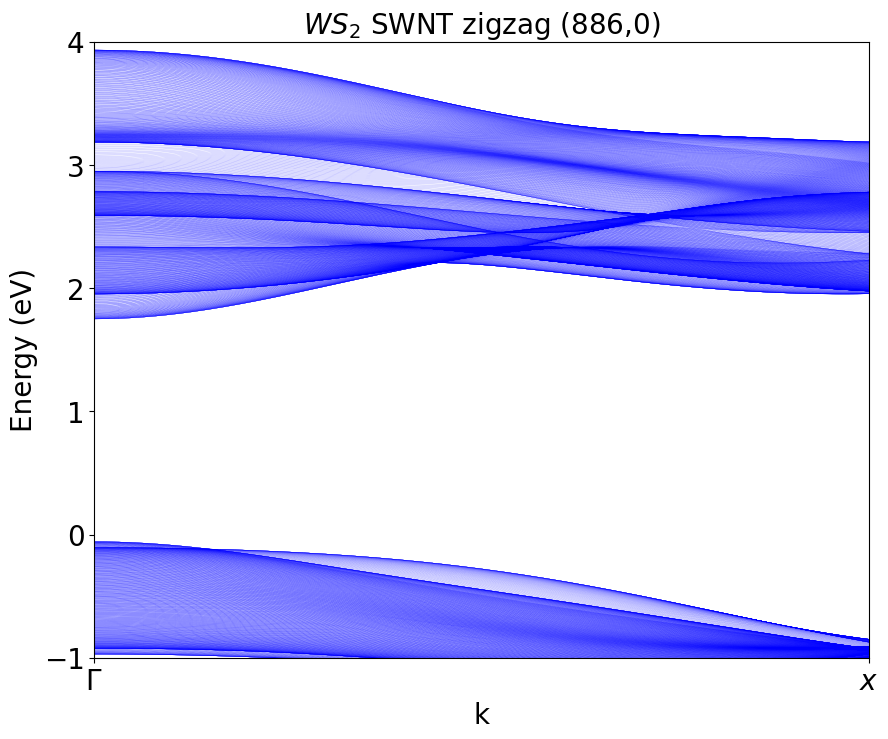

In [135]:
fig = plt.figure(figsize = (10, 8))
plt.title('$WS_2$ SWNT zigzag (886,0)', fontsize = 20)
plt.plot(band_zigzag, color = 'blue', linewidth = 0.05)
plt.xlim(0, 190)
plt.ylim(-1, 4)
plt.xticks([0, 190], [r'$\Gamma$', r'$x$'], fontsize = 20)
plt.yticks([-1, 0, 1, 2, 3, 4], fontsize = 20)
plt.xlabel('k', fontsize = 20)
plt.ylabel('Energy (eV)', fontsize = 20)
plt.show()

record kx,ky

(18,0)
        kx = np.linspace(i*2*np.pi/18, i*2*np.pi/18, 200)
        ky = np.linspace(np.pi/np.sqrt(3), -np.pi/np.sqrt(3), 200)

(18,18)
        kx = np.linspace(-np.pi/2 + i*np.pi/18, np.pi/2 + i*np.pi/18, 200)
        ky = np.linspace(np.pi*np.sqrt(3)/2 + i*np.pi/(18*np.sqrt(3)), -np.pi*np.sqrt(3)/2 + i*np.pi/(18*np.sqrt(3)), 200)

(18,17)
        kx = np.linspace(-17*np.pi/1838 + i*53*np.pi/919, 17*np.pi/1838 + i*53*np.pi/919, 200)
        ky = np.linspace(17*np.pi/(1838*np.sqrt(3)) + 6*np.sqrt(3)*np.pi/919 + i*17*np.sqrt(3)*np.pi/919, -17*np.pi/(1838*np.sqrt(3)) - 6*np.sqrt(3)*np.pi/919 + i*17*np.sqrt(3)*np.pi/919, 200)

(18,15)
      kx = np.linspace(-5*np.pi/182 + i*17*np.pi/273, 5*np.pi/182 + i*17*np.pi/273, 200)
        ky = np.linspace(5*np.pi/(182*np.sqrt(3)) + 2*np.sqrt(3)*np.pi/91 + i*5*np.pi/(91*np.sqrt(3)), -5*np.pi/(182*np.sqrt(3)) - 2*np.sqrt(3)*np.pi/91 + i*5*np.pi/(91*np.sqrt(3)), 200)

(24,12)
        kx = np.linspace(-np.pi/14 + i*5*np.pi/84, np.pi/14 + i*5*np.pi/84, 200)
        ky = np.linspace(5*np.pi/(np.sqrt(3)*14) + i*np.pi/(28*np.sqrt(3)), -5*np.pi/(np.sqrt(3)*14) + i*np.pi/(28*np.sqrt(3)), 200)

(24,24)
        kx = np.linspace(-np.pi/2 + i*np.pi/24, np.pi/2 + i*np.pi/24, 200)
        ky = np.linspace(np.pi*np.sqrt(3)/2 + i*np.pi/(24*np.sqrt(3)), -np.pi*np.sqrt(3)/2 + i*np.pi/(24*np.sqrt(3)), 200)

(24,0)


@article{Reference1,
	Abstract = {We have developed an enhanced Littrow configuration extended cavity diode laser (ECDL) that can be tuned without changing the direction of the output beam. The output of a conventional Littrow ECDL is reflected from a plane mirror fixed parallel to the tuning diffraction grating. Using a free-space Michelson wavemeter to measure the laser wavelength, we can tune the laser over a range greater than 10 nm without any alteration of alignment.},
	Author = {C. J. Hawthorn and K. P. Weber and R. E. Scholten},
	Journal = {Review of Scientific Instruments},
	Month = {12},
	Number = {12},
	Numpages = {3},
	Pages = {4477--4479},
	Title = {Littrow Configuration Tunable External Cavity Diode Laser with Fixed Direction Output Beam},
	Volume = {72},
	Url = {http://link.aip.org/link/?RSI/72/4477/1},
	Year = {2001}}

@article{Reference3,
	Abstract = {Operating a laser diode in an extended cavity which provides frequency-selective feedback is a very effective method of reducing the laser's linewidth and improving its tunability. We have developed an extremely simple laser of this type, built from inexpensive commercial components with only a few minor modifications. A 780~nm laser built to this design has an output power of 80~mW, a linewidth of 350~kHz, and it has been continuously locked to a Doppler-free rubidium transition for several days.},
	Author = {A. S. Arnold and J. S. Wilson and M. G. Boshier and J. Smith},
	Journal = {Review of Scientific Instruments},
	Month = {3},
	Number = {3},
	Numpages = {4},
	Pages = {1236--1239},
	Title = {A Simple Extended-Cavity Diode Laser},
	Volume = {69},
	Url = {http://link.aip.org/link/?RSI/69/1236/1},
	Year = {1998}}

@article{Reference2,
	Abstract = {We present a review of the use of diode lasers in atomic physics with an extensive list of references. We discuss the relevant characteristics of diode lasers and explain how to purchase and use them. We also review the various techniques that have been used to control and narrow the spectral outputs of diode lasers. Finally we present a number of examples illustrating the use of diode lasers in atomic physics experiments. Review of Scientific Instruments is copyrighted by The American Institute of Physics.},
	Author = {Carl E. Wieman and Leo Hollberg},
	Journal = {Review of Scientific Instruments},
	Keywords = {Diode Laser},
	Month = {1},
	Number = {1},
	Numpages = {20},
	Pages = {1--20},
	Title = {Using Diode Lasers for Atomic Physics},
	Volume = {62},
	Url = {http://link.aip.org/link/?RSI/62/1/1},
	Year = {1991}}

@article{PhysRevLett.108.196802,
  title = {Coupled Spin and Valley Physics in Monolayers of ${\mathrm{MoS}}_{2}$ and Other Group-VI Dichalcogenides},
  author = {Xiao, Di and Liu, Gui-Bin and Feng, Wanxiang and Xu, Xiaodong and Yao, Wang},
  journal = {Phys. Rev. Lett.},
  volume = {108},
  issue = {19},
  pages = {196802},
  numpages = {5},
  year = {2012},
  month = {May},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevLett.108.196802},
  url = {https://link.aps.org/doi/10.1103/PhysRevLett.108.196802}
}

@article{paper1,
  title = {Three-band tight-binding model for monolayers of group-VIB transition metal dichalcogenides},
  author = {Liu, Gui-Bin and Shan, Wen-Yu and Yao, Yugui and Yao, Wang and Xiao, Di},
  journal = {Phys. Rev. B},
  volume = {88},
  issue = {8},
  pages = {085433},
  numpages = {10},
  year = {2013},
  month = {Aug},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevB.88.085433},
  url = {https://link.aps.org/doi/10.1103/PhysRevB.88.085433}
}

@article{PhysRevB.79.115409,
  title = {Electronic structure of two-dimensional crystals from ab initio theory},
  author = {Leb\`egue, S. and Eriksson, O.},
  journal = {Phys. Rev. B},
  volume = {79},
  issue = {11},
  pages = {115409},
  numpages = {4},
  year = {2009},
  month = {Mar},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevB.79.115409},
  url = {https://link.aps.org/doi/10.1103/PhysRevB.79.115409}
}

@article{PhysRevB.84.153402,
  title = {Giant spin-orbit-induced spin splitting in two-dimensional transition-metal dichalcogenide semiconductors},
  author = {Zhu, Z. Y. and Cheng, Y. C. and Schwingenschl\"ogl, U.},
  journal = {Phys. Rev. B},
  volume = {84},
  issue = {15},
  pages = {153402},
  numpages = {5},
  year = {2011},
  month = {Oct},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevB.84.153402},
  url = {https://link.aps.org/doi/10.1103/PhysRevB.84.153402}
}

@article{paper4,
  title = {Coupled Spin and Valley Physics in Monolayers of ${\mathrm{MoS}}_{2}$ and Other Group-VI Dichalcogenides},
  author = {Xiao, Di and Liu, Gui-Bin and Feng, Wanxiang and Xu, Xiaodong and Yao, Wang},
  journal = {Phys. Rev. Lett.},
  volume = {108},
  issue = {19},
  pages = {196802},
  numpages = {5},
  year = {2012},
  month = {May},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevLett.108.196802},
  url = {https://link.aps.org/doi/10.1103/PhysRevLett.108.196802}
}

@article{graphene,
author = {K. S. Novoselov  and A. K. Geim  and S. V. Morozov  and D. Jiang  and Y. Zhang  and S. V. Dubonos  and I. V. Grigorieva  and A. A. Firsov },
title = {Electric Field Effect in Atomically Thin Carbon Films},
journal = {Science},
volume = {306},
number = {5696},
pages = {666-669},
year = {2004},
doi = {10.1126/science.1102896},
URL = {https://www.science.org/doi/abs/10.1126/science.1102896},
eprint = {https://www.science.org/doi/pdf/10.1126/science.1102896},
abstract = {We describe monocrystalline graphitic films, which are a few atoms thick but are nonetheless stable under ambient conditions, metallic, and of remarkably high quality. The films are found to be a two-dimensional semimetal with a tiny overlap between valence and conductance bands, and they exhibit a strong ambipolar electric field effect such that electrons and holes in concentrations up to 1013 per square centimeter and with room-temperature mobilities of ∼10,000 square centimeters per volt-second can be induced by applying gate voltage.}}

@article{coleman2011two,
  title={Two-dimensional nanosheets produced by liquid exfoliation of layered materials},
  author={Coleman, Jonathan N and Lotya, Mustafa and O’Neill, Arlene and Bergin, Shane D and King, Paul J and Khan, Umar and Young, Karen and Gaucher, Alexandre and De, Sukanta and Smith, Ronan J and others},
  journal={Science},
  volume={331},
  number={6017},
  pages={568--571},
  year={2011},
  publisher={American Association for the Advancement of Science}
}

@article{radisavljevic2011single,
  title={Single-layer MoS2 transistors},
  author={Radisavljevic, Branimir and Radenovic, Aleksandra and Brivio, Jacopo and Giacometti, Valentina and Kis, Andras},
  journal={Nature nanotechnology},
  volume={6},
  number={3},
  pages={147--150},
  year={2011},
  publisher={Nature Publishing Group UK London}
}

@article{PhysRevLett.99.236809,
  title = {Valley-Contrasting Physics in Graphene: Magnetic Moment and Topological Transport},
  author = {Xiao, Di and Yao, Wang and Niu, Qian},
  journal = {Phys. Rev. Lett.},
  volume = {99},
  issue = {23},
  pages = {236809},
  numpages = {4},
  year = {2007},
  month = {Dec},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevLett.99.236809},
  url = {https://link.aps.org/doi/10.1103/PhysRevLett.99.236809}
}

@article{PhysRevB.77.235406,
  title = {Valley-dependent optoelectronics from inversion symmetry breaking},
  author = {Yao, Wang and Xiao, Di and Niu, Qian},
  journal = {Phys. Rev. B},
  volume = {77},
  issue = {23},
  pages = {235406},
  numpages = {7},
  year = {2008},
  month = {Jun},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevB.77.235406},
  url = {https://link.aps.org/doi/10.1103/PhysRevB.77.235406}
}

@book{dresselhaus1998physical,
  title={Physical properties of carbon nanotubes},
  author={Dresselhaus, G and Dresselhaus, Mildred S and Saito, Riichiro},
  year={1998},
  publisher={World scientific}
}

@article{paper_b,
  title={Electromechanics in MoS2 and WS2: nanotubes vs. monolayers},
  author={Ghorbani-Asl, Mahdi and Zibouche, Nourdine and Wahiduzzaman, Mohammad and Oliveira, Augusto F and Kuc, Agnieszka and Heine, Thomas},
  journal={Scientific reports},
  volume={3},
  number={1},
  pages={2961},
  year={2013},
  publisher={Nature Publishing Group UK London}
}

@Article{paper2,
author ="Liu, Gui-Bin and Xiao, Di and Yao, Yugui and Xu, Xiaodong and Yao, Wang",
title  ="Electronic structures and theoretical modelling of two-dimensional group-VIB transition metal dichalcogenides",
journal  ="Chem. Soc. Rev.",
year  ="2015",
volume  ="44",
issue  ="9",
pages  ="2643-2663",
publisher  ="The Royal Society of Chemistry",
doi  ="10.1039/C4CS00301B",
url  ="http://dx.doi.org/10.1039/C4CS00301B",
abstract  ="Atomically thin group-VIB transition metal dichalcogenides (TMDs) have recently emerged as a new class of two-dimensional (2D) semiconductors with extraordinary properties including the direct band gap in the visible frequency range{,} the pronounced spin–orbit coupling{,} the ultra-strong Coulomb interaction{,} and the rich physics associated with the valley degree of freedom. These 2D TMDs exhibit great potential for device applications and have attracted vast interest for the exploration of new physics. 2D TMDs have complex electronic structures which underlie their physical properties. Here we review the bulk electronic structures of these new 2D materials as well as the theoretical models developed at different levels{,} along which we sort out the understanding of the origins of a variety of properties observed or predicted."}

@article{PhysRevLett.85.146,
  title = {Structure and Electronic Properties of ${\mathrm{MoS}}_{2}$ Nanotubes},
  author = {Seifert, Gotthard and Terrones, Humberto and Terrones, Mauricio and Jungnickel, Gerd and Frauenheim, Thomas},
  journal = {Phys. Rev. Lett.},
  volume = {85},
  issue = {1},
  pages = {146--149},
  numpages = {0},
  year = {2000},
  month = {Jul},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevLett.85.146},
  url = {https://link.aps.org/doi/10.1103/PhysRevLett.85.146}
}

@article{paper_c,
  title={From layers to nanotubes: Transition metal disulfides TMS 2},
  author={Zibouche, Nourdine and Kuc, Agnieszka and Heine, Thomas},
  journal={The European Physical Journal B},
  volume={85},
  pages={1--7},
  year={2012},
  publisher={Springer}
}

@article{paper_d,
  title = {Band structure of MoSTe Janus nanotubes},
  author = {Mikkelsen, August E. G. and B\"olle, Felix T. and Thygesen, Kristian S. and Vegge, Tejs and Castelli, Ivano E.},
  journal = {Phys. Rev. Mater.},
  volume = {5},
  issue = {1},
  pages = {014002},
  numpages = {6},
  year = {2021},
  month = {Jan},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevMaterials.5.014002},
  url = {https://link.aps.org/doi/10.1103/PhysRevMaterials.5.014002}
}

@article{paper_a,
  title={Enhanced intrinsic photovoltaic effect in tungsten disulfide nanotubes},
  author={Zhang, YJ and Ideue, Toshiya and Onga, Masaru and Qin, Feng and Suzuki, Ryuji and Zak, Alla and Tenne, Reshef and Smet, JH and Iwasa, Yoshihiro},
  journal={Nature},
  volume={570},
  number={7761},
  pages={349--353},
  year={2019},
  publisher={Nature Publishing Group UK London}
}

@article{kral2000photogalvanic,
  title={Photogalvanic effects in heteropolar nanotubes},
  author={Kr{\'a}l, Petr and Mele, EJ and Tom{\'a}nek, David},
  journal={Physical review letters},
  volume={85},
  number={7},
  pages={1512},
  year={2000},
  publisher={APS}
}

@article{paper3,
  title={Spin and pseudospins in layered transition metal dichalcogenides},
  author={Xu, Xiaodong and Yao, Wang and Xiao, Di and Heinz, Tony F},
  journal={Nature Physics},
  volume={10},
  number={5},
  pages={343--350},
  year={2014},
  publisher={Nature Publishing Group UK London}
}

